Data downloaded from kaggle:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D
import pickle
import numpy as np


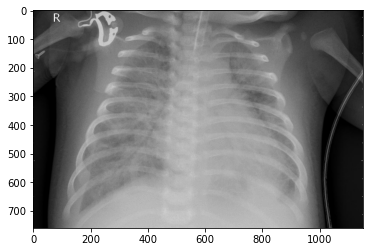

In [2]:
DATADIR="F:/Hadoop Project/Data sets/chest_xray - Copy/train"
CATEGORIES=["Pneumonia","Normal"]

for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  #grayscale
        plt.imshow(img_array,cmap="gray")
        break
    break


In [3]:
print(img_array.shape)

(760, 1152)


In [4]:
print(img_array)

[[19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 [19 19 18 ...  1  0  0]
 ...
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]
 [10 10 10 ... 15 15 15]]


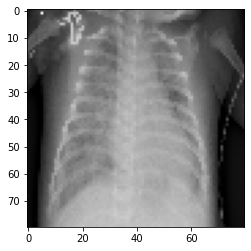

In [5]:
IMG_SIZE=80
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")

In [6]:
training_data=[]

def create_train_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  #grayscale
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                print(e)

In [7]:
create_train_data()

In [8]:
print(len(training_data))

5216


In [9]:
training_data[1000]

[array([[13, 25, 29, ...,  0,  0,  0],
        [13, 24, 28, ...,  0,  0,  0],
        [16, 22, 30, ...,  7,  2,  0],
        ...,
        [33, 56, 86, ..., 40, 24,  6],
        [39, 61, 77, ..., 38, 24,  8],
        [40, 64, 89, ..., 40, 24, 10]], dtype=uint8),
 0]

In [10]:
import random

random.shuffle(training_data)

In [11]:
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [12]:
import pickle

pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [13]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

In [14]:
X=tf.keras.utils.normalize(X,axis=1)
y = np.array(y)

In [15]:
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dense(128))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

#model.fit(X,y,batch_size=32, epochs=40,validation_split=0.1)

In [16]:
model.fit(X,y,batch_size=32, epochs=5)

Epoch 1/5
163/163 [==============================] - 14s 84ms/step - loss: 0.3042 - accuracy: 0.8744
Epoch 2/5
163/163 [==============================] - 14s 85ms/step - loss: 0.1109 - accuracy: 0.9578
Epoch 3/5
163/163 [==============================] - 14s 85ms/step - loss: 0.0871 - accuracy: 0.9664
Epoch 4/5
163/163 [==============================] - 14s 85ms/step - loss: 0.0810 - accuracy: 0.9707
Epoch 5/5
163/163 [==============================] - 14s 85ms/step - loss: 0.0622 - accuracy: 0.9760


In [17]:
CATEGORIES=["Normal","Pneumonia"]

def prepare(filepath):
    IMG_SIZE=80
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [18]:
prediction=model.predict([prepare('test/Normal/IM-0005-0001.jpeg')])
print(prediction)

[[0.]]
